# Import packages

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Read data

In [3]:
# Data from Kaggle competition
comp_data_df_train = pd.read_csv("data/competition-data/train.csv")
comp_data_df_test = pd.read_csv("data/competition-data/test.csv")

# Original data
orig_data_df = pd.read_csv("data/original-data/smoking.csv")

In [4]:
comp_data_df_test.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [5]:
orig_data_df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [6]:
comp_data_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [7]:
orig_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

# Combine datasets

In [8]:
# drop columns
comp_data_df_train = comp_data_df_train.drop(columns=['id'])
orig_data_df = orig_data_df.drop(columns=['ID', 'gender', 'oral', 'tartar'])

In [9]:
orig_data_df.shape

(55692, 23)

In [10]:
print("competition train shape:", comp_data_df_train.shape)
print("original train shape:", orig_data_df.shape)

competition train shape: (159256, 23)
original train shape: (55692, 23)


In [11]:
# combine datasets
df_train = pd.concat([comp_data_df_train, orig_data_df])
df_train.shape

(214948, 23)

# Clean data

## Remove duplicate rows

In [12]:
df_train = df_train.drop_duplicates()
df_train.shape

(203808, 23)

## Check for missing values

In [13]:
df_train.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

## Rename columns

In [14]:
new_col_names = {
    "systolic": "systolic bp",
    "relaxation": "diastolic bp",
    "Gtp": "GGT",
    "dental caries": "dental cavities"
}

df_train = df_train.rename(columns=new_col_names)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203808 entries, 0 to 44552
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  203808 non-null  int64  
 1   height(cm)           203808 non-null  int64  
 2   weight(kg)           203808 non-null  int64  
 3   waist(cm)            203808 non-null  float64
 4   eyesight(left)       203808 non-null  float64
 5   eyesight(right)      203808 non-null  float64
 6   hearing(left)        203808 non-null  float64
 7   hearing(right)       203808 non-null  float64
 8   systolic bp          203808 non-null  float64
 9   diastolic bp         203808 non-null  float64
 10  fasting blood sugar  203808 non-null  float64
 11  Cholesterol          203808 non-null  float64
 12  triglyceride         203808 non-null  float64
 13  HDL                  203808 non-null  float64
 14  LDL                  203808 non-null  float64
 15  hemoglobin           20

## Change blindness value to 0

An eyesight value of 9.9 indicates blindness. We will change this so 0 indicates blindness.

In [15]:
df_train['eyesight(left)'] = df_train['eyesight(left)'].replace(to_replace=9.9, value=0)
df_train['eyesight(right)'] = df_train['eyesight(right)'].replace(to_replace=9.9, value=0)

# EDA

In [16]:
df_train.describe(include='all').transpose()  # using transpose to see all columns easier

,count,mean,std,min,25%,50%,75%,max
age,203808.0,44.285656,11.896734,20.0,40.0,40.0,55.0,85.0
height(cm),203808.0,165.133606,8.906900,130.0,160.0,165.0,170.0,190.0
weight(kg),203808.0,66.868185,12.649219,30.0,55.0,65.0,75.0,135.0
waist(cm),203808.0,82.799830,9.037021,51.0,76.8,83.0,89.0,129.0
eyesight(left),203808.0,0.997088,0.315326,0.0,0.8,1.0,1.2,2.0
eyesight(right),203808.0,0.993224,0.314272,0.0,0.8,1.0,1.2,2.0
hearing(left),203808.0,1.024332,0.154077,1.0,1.0,1.0,1.0,2.0
hearing(right),203808.0,1.023993,0.153028,1.0,1.0,1.0,1.0,2.0
systolic bp,203808.0,122.290631,12.951378,71.0,113.0,121.0,130.0,240.0
diastolic bp,203808.0,76.692470,9.158813,40.0,70.0,77.0,82.0,146.0


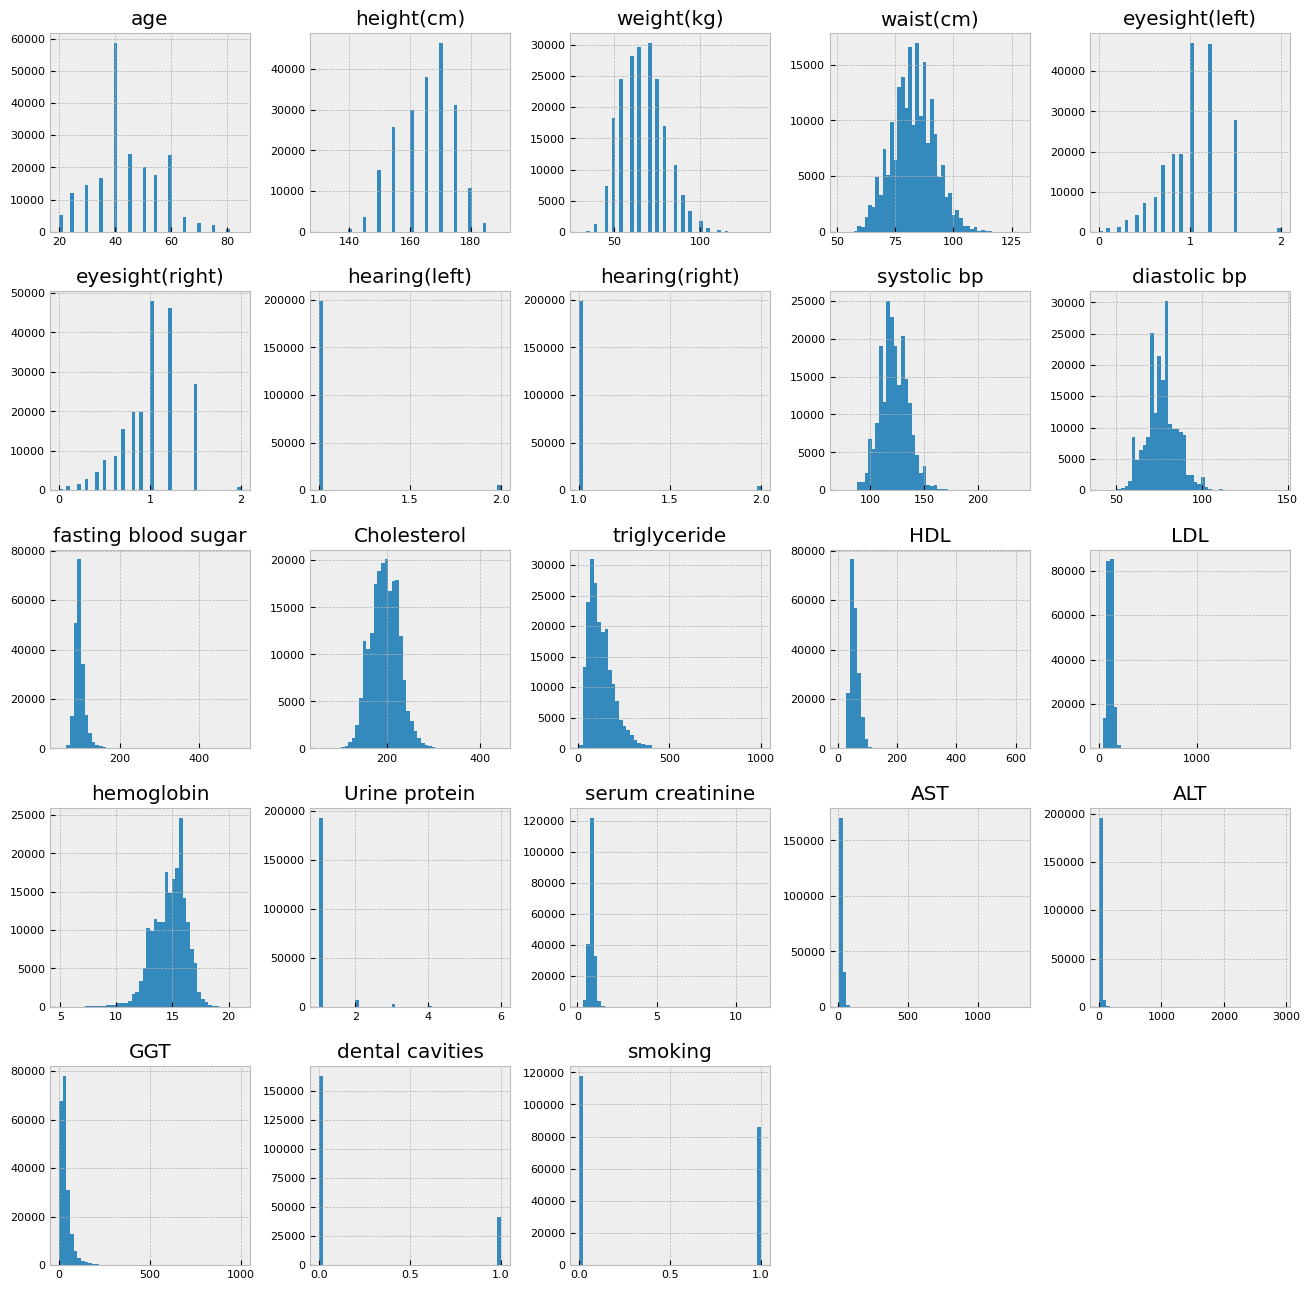

In [30]:
df_train.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);

In [18]:
comp_bins = sorted(comp_data_df_train['age'].unique())
comp_bins

[20, 25, 30, 35, 40, 45, 49, 50, 55, 58, 60, 62, 65, 69, 70, 75, 80, 85]

In [19]:
comp_data_df_train['age'].value_counts()

age
40    46691
60    19043
45    18480
50    15768
55    13446
35    13081
30    11465
25     9140
20     3829
65     3637
70     2229
75     1760
80      644
85       38
58        2
62        1
69        1
49        1
Name: count, dtype: int64

In [20]:
orig_bins = sorted(orig_data_df['age'].unique())

In [21]:
orig_data_df['age'].value_counts()

age
40    15181
45     7037
60     6167
50     5549
55     5020
35     4480
30     4056
25     3525
20     1605
65     1336
70      827
75      614
80      280
85       15
Name: count, dtype: int64

<Axes: xlabel='age'>

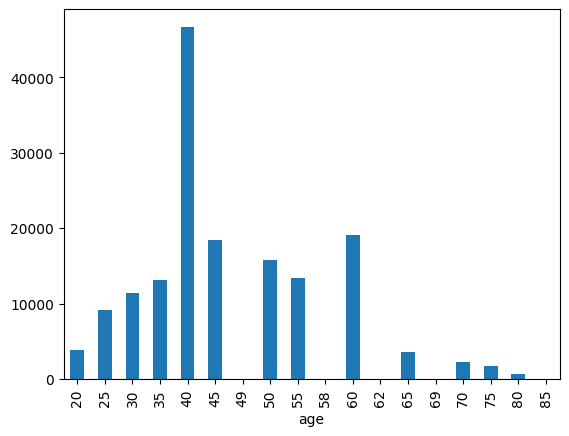

In [22]:
comp_data_df_train['age'].value_counts()[comp_bins].plot(kind='bar')

<Axes: xlabel='age'>

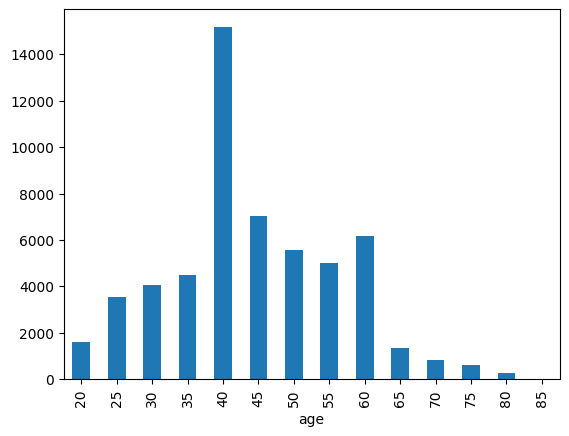

In [23]:
orig_data_df['age'].value_counts()[orig_bins].plot(kind='bar')